In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
#import the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
df = pd.read_csv(url)
df.head(5)


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


# CREATING VISUALIZATIONS FOR DATA ANALYSIS

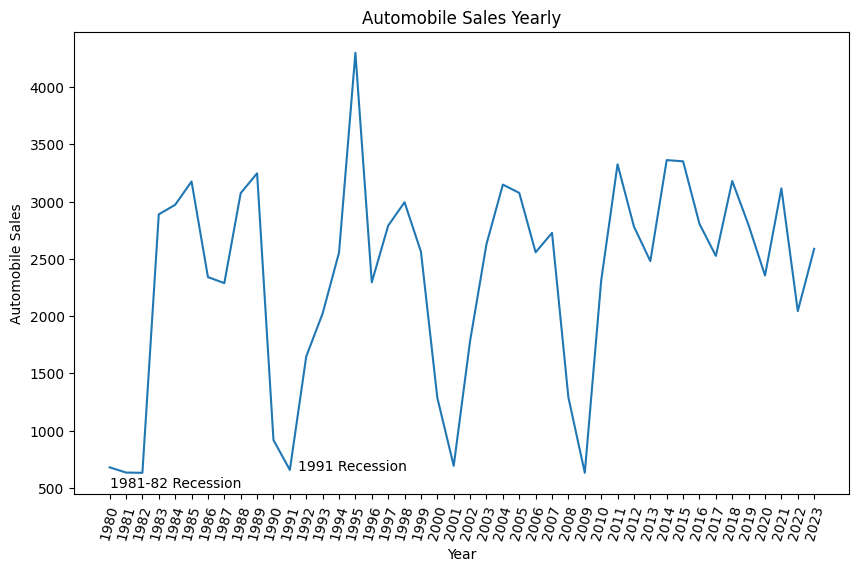

In [4]:
#Task 1. Develop line chart to show how automobile sales fluctuate from year to year
dfSales = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
dfSales.plot(kind = 'line')
plt.xticks(list(range(1980, 2024)), rotation = 75)
plt.title('Automobile Sales Yearly')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.text(1980,500,'1981-82 Recession')
plt.text(1991.5, 650, '1991 Recession')
plt.show()

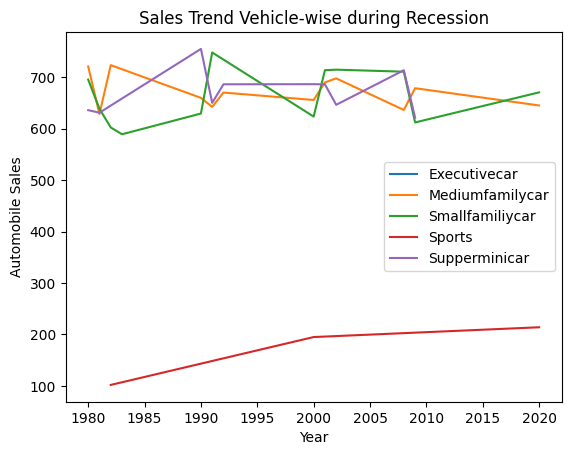

In [5]:
#Task 2. Analyse the noticeable difference in sales trends between different vehicle types during recession periods
dfRec = df[df['Recession'] == 1]
dfGrouped = dfRec.groupby(['Year','Vehicle_Type'], as_index = False)['Automobile_Sales'].mean()
dfGrouped.set_index('Year',inplace = True)
dfVis = dfGrouped.groupby(['Vehicle_Type'])['Automobile_Sales']
dfVis.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

From the visualization above, we can conclude that during the recession period (at the range of 1980 - 200), the sales for Sports car is decreasing during its high price, but in other wise, the number sales of smallfamilycar and supperminicar is increasing. But after the recession has come to its end, the sports car's sales number is getting increase.

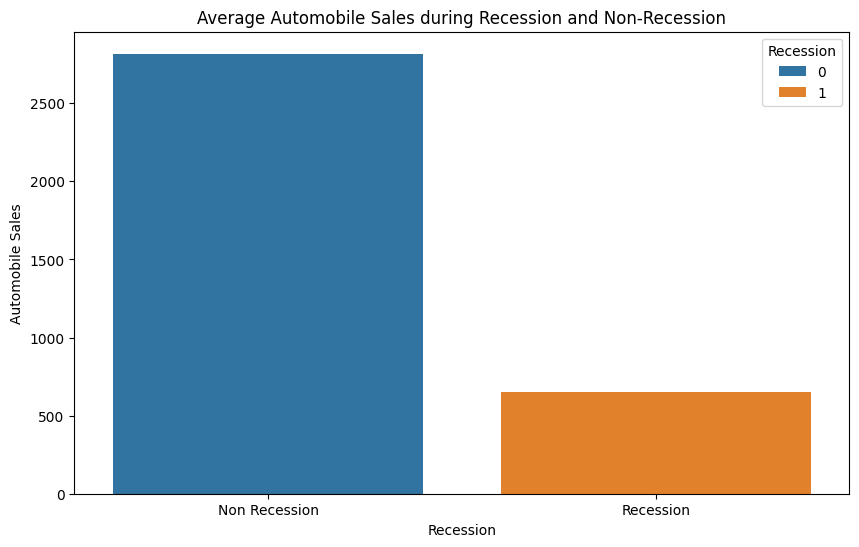

In [6]:
#Task 3. Create visualization to compare the sales trend per vehicle type for a recession period with a non recession period
dfgroupeds = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = dfgroupeds, x = 'Recession', y = 'Automobile_Sales', hue = 'Recession')
plt.xlabel('Recession')
plt.ylabel("Automobile Sales")
plt.title("Average Automobile Sales during Recession and Non-Recession")
plt.xticks([0,1], ['Non Recession','Recession']) #TO CHANGE THE DISPLAY VALUES CATEGORIES
plt.show()

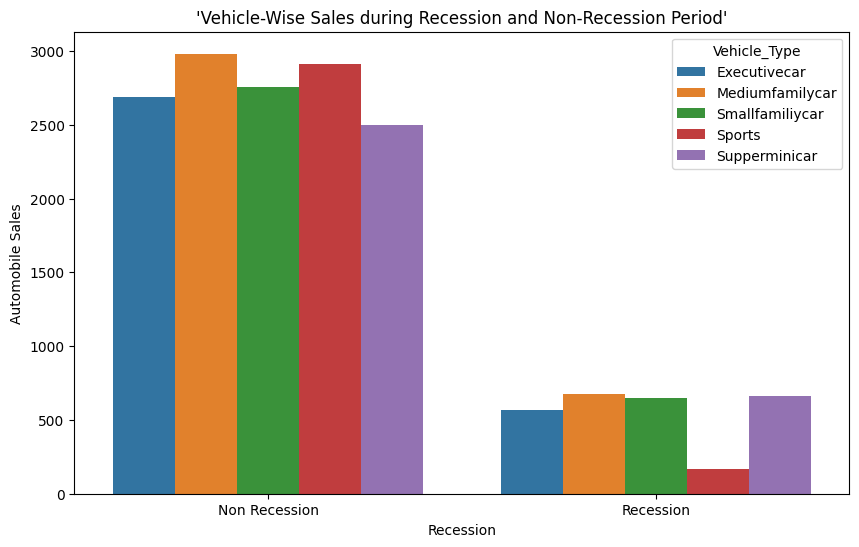

In [7]:
#Compare between the number of sales, recession and vehicle type
dd = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = dd, x = 'Recession', y = 'Automobile_Sales', hue = 'Vehicle_Type')
plt.xlabel('Recession')
plt.ylabel("Automobile Sales")
plt.title("'Vehicle-Wise Sales during Recession and Non-Recession Period'")
plt.xticks([0,1], ['Non Recession','Recession']) #TO CHANGE THE DISPLAY VALUES CATEGORIES
plt.show()

From the visualization above, we can conclude that there are much more vehicles that sold during the non recession period, and mostly its sold the expensive types like sports and medium family car. Otherwise, during the recession, its only has low number of sales, with the sports has the lowest sales number

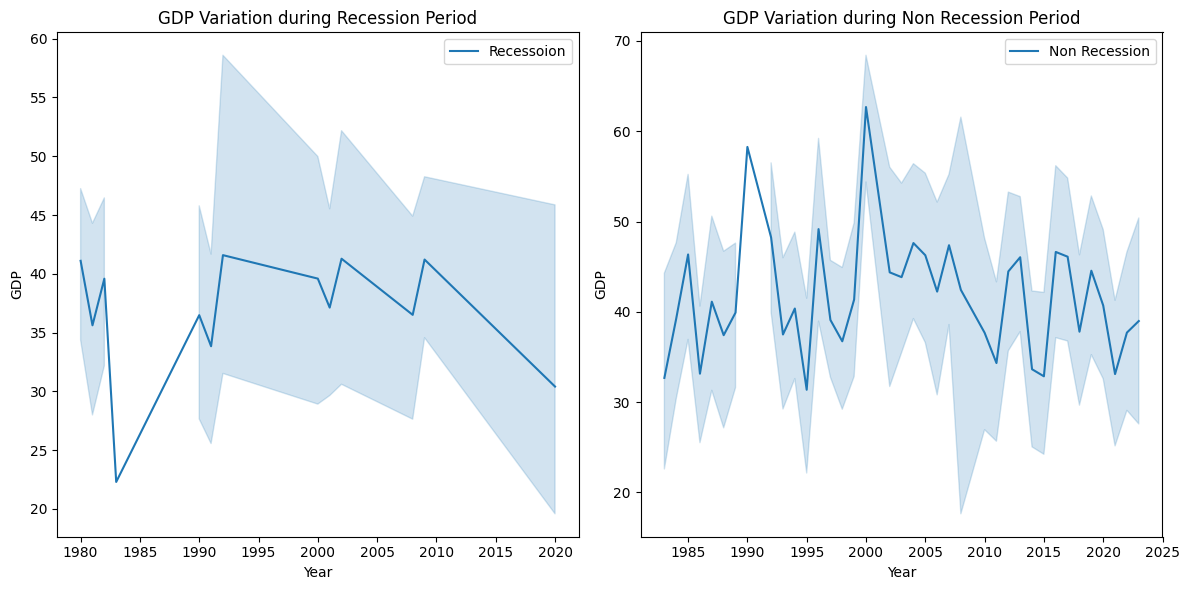

In [8]:
#Compare the variations in GDP during recession and non recession period
recDf = df[df['Recession']==1]
nrecDf = df[df['Recession']==0]

#create the figure
fig = plt.figure(figsize=(12,6))

#create different axes for subploting
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#ax 0, the first row
sns.lineplot(data = recDf, x = 'Year', y = 'GDP', label = 'Recessoion', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#ax 1, second row
sns.lineplot(data = nrecDf, x = 'Year', y='GDP', label = 'Non Recession', ax = ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')

plt.tight_layout()
plt.show()

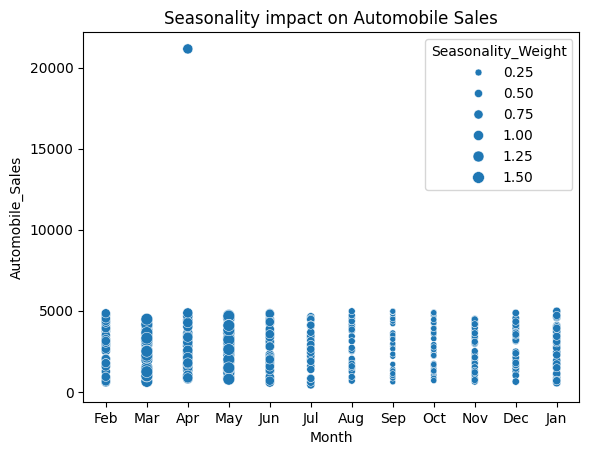

In [9]:
#Task 5. Develop Bubble Plot to display the impact of seasonality on Automobile Sales
nrecDf = df[df['Recession']==0]
sizeDf = nrecDf['Seasonality_Weight']

sns.scatterplot(data = nrecDf, x='Month', y='Automobile_Sales', size = sizeDf)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Text(0.5, 1.0, 'Consumer Confidence and Automobile Sales during Recessions')

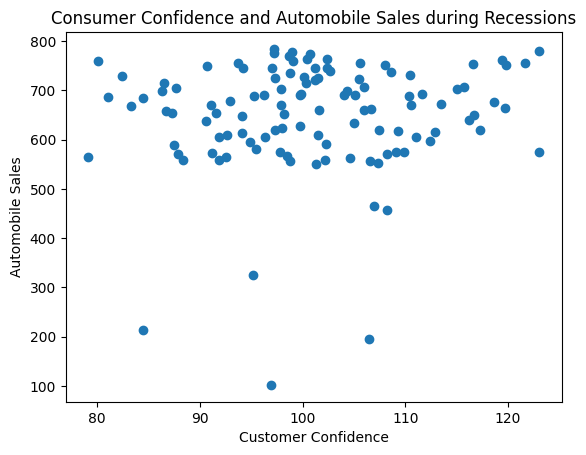

In [10]:
#Task 6. Develop a scatter plot to find out the correlation between average vehicle price relate to the sales volume during recessions
dfRec = df[df['Recession'] == 1]
plt.scatter(dfRec['Consumer_Confidence'], dfRec['Automobile_Sales'])
plt.xlabel("Customer Confidence")
plt.ylabel("Automobile Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")

Text(0.5, 1.0, 'Relationship between Average Vehicle Price and Sales during Recessions')

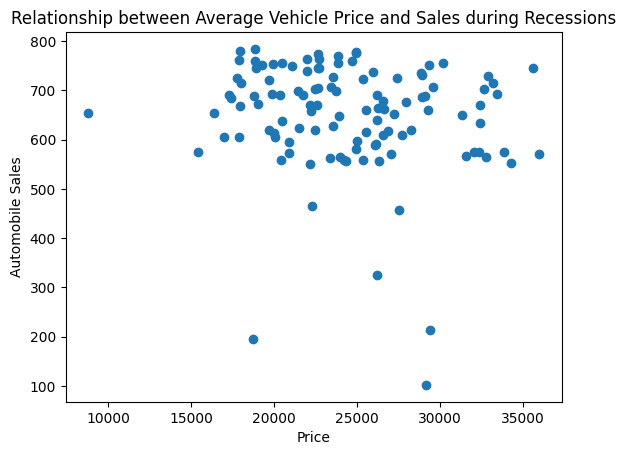

In [11]:
#Relationship between Average Vehicle Price and Sales during Recessions
dfRec = df[df['Recession'] == 1]
plt.scatter(dfRec['Price'], dfRec['Automobile_Sales'])
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")

Text(0.5, 1.0, 'The Portyion of Advertising of XYZAutomotives during Recession and Non Recession')

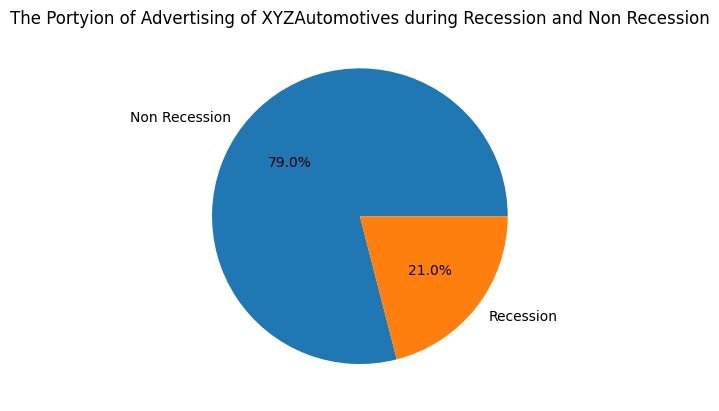

In [12]:
#Task 7. Create pie chart to display the portion of advertising expenditure of XYZAutomotives during recession n non-recession
sumrec = df.groupby('Recession')['Advertising_Expenditure'].sum()
plt.pie(sumrec, labels = ['Non Recession','Recession'], autopct = '%1.1f%%')
plt.title("The Portyion of Advertising of XYZAutomotives during Recession and Non Recession")

From the visualization, we can conclude that ABCAutomotives is spending more expenses on the non recession period for the advertisement than the recession period

Text(0.5, 1.0, 'Total Advertisement Expenditure for Each Vehicle Type during Recession')

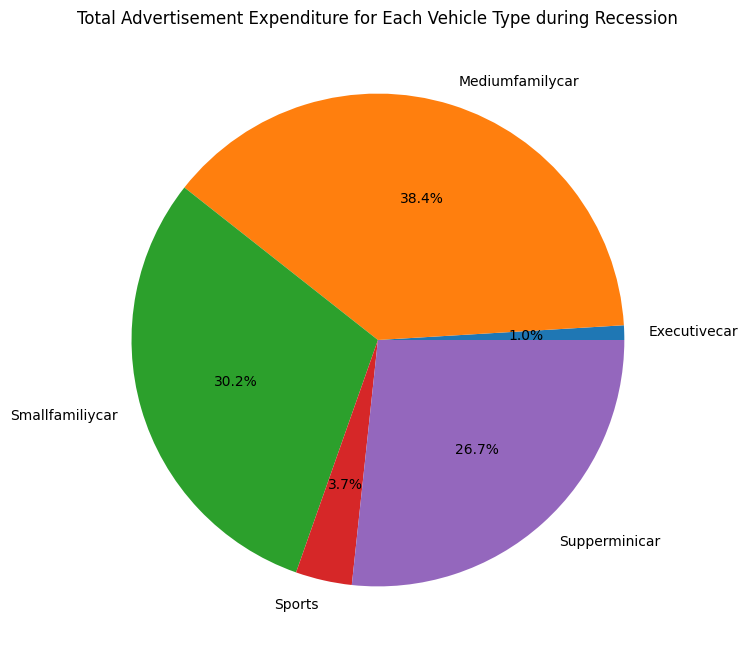

In [13]:
#Task 8. Develop a Pie Chart to display total advertisement expenditure for each vehicle type during recession
dfgrouped = dfRec.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(12,8))
plt.pie(dfgrouped, labels = dfgrouped.index, autopct = '%1.1f%%')
plt.title("Total Advertisement Expenditure for Each Vehicle Type during Recession")

From the visualization, we can conclude that during the recession period, the small family, medium family and supper mini car is mostly sold because there are have low price cost, otherwise the executive and sport is very low due to its high price

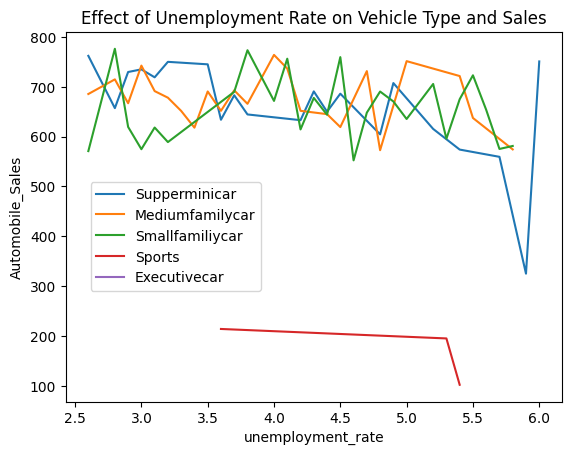

In [14]:
#Task 9. Develop a lineplot to analyze the effect of the unemplotment rate on vehicle type and sales during the recession
recDf = df[df['Recession'] == 1]
sns.lineplot(data = recDf, x = 'unemployment_rate', y = 'Automobile_Sales', hue = 'Vehicle_Type', markers = 'o', err_style = None)
plt.ylim = (0,850)
plt.title ("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc = (0.05,.3))


From the graph above, we can summarize that During recession, buying pattern is changing, the sales of low range vehicle like super mini,small family and medium mini car